**Importing all the necessary dependencies**

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
# Loading the dataset into a pandas dataframe
data = pd.read_csv('/content/chennai_bus_arrival_time.csv')

In [39]:
# Defining the features and target
X = data.drop(columns=['Predicted_Arrival_Time_min', 'Bus_ID'])
y = data['Predicted_Arrival_Time_min']

In [40]:
# Splitting the data as per Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Data Preprocessing pipeline
numeric_features = ['Distance_to_Destination_km', 'Bus_Speed_kmh', 'Traffic_Density_%', 'Stops_Remaining']
categorical_features = ['Route_Number', 'Weather_Condition', 'Day_of_Week', 'Time_of_Day']

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [43]:
# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6, random_state=42))
])

In [44]:
# Training the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance_to_Destination_km',
                                                   'Bus_Speed_kmh',
                                                   'Traffic_Density_%',
                                                   'Stops_Remaining']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Route_Number',
                                                   'Weather_Condition',
                                                   'Day_of_Week',
                                                   'Time_of_Day'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callba...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [45]:
# Predicting and evaluating the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
print(f"Mean Absolute Error: {mae:.2f} minutes")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 2.76 minutes
R² Score: 0.9800


1. Distribution of Predicted Arrival Time


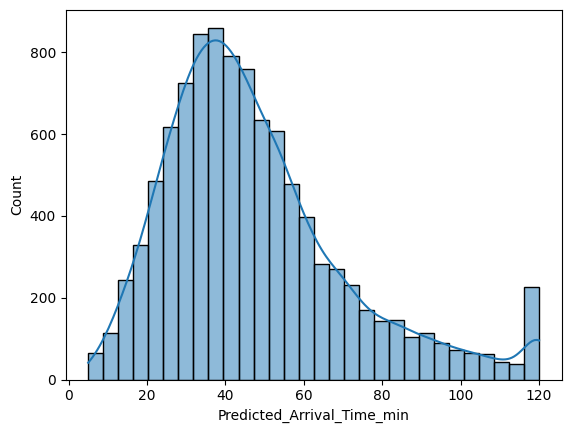

2. Traffic Density vs. Arrival Time


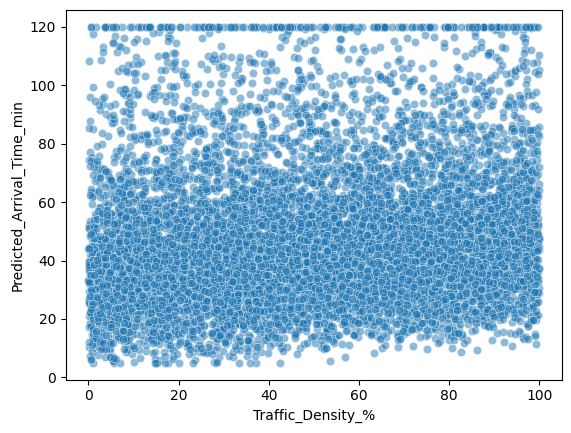

3. Model Performance: Predicted vs. Actual


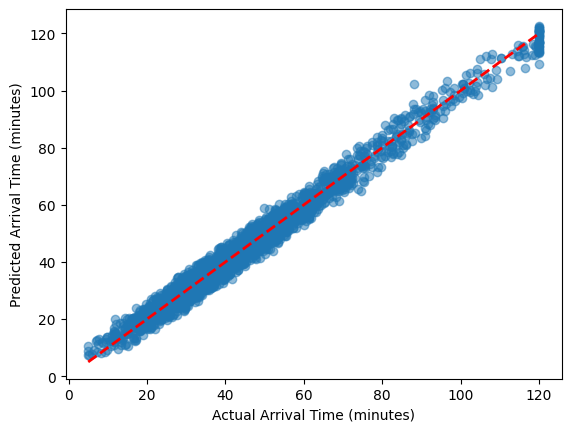

In [47]:
print("1. Distribution of Predicted Arrival Time")
sns.histplot(data['Predicted_Arrival_Time_min'], bins=30, kde=True)
plt.show()

print("2. Traffic Density vs. Arrival Time")
sns.scatterplot(x='Traffic_Density_%', y='Predicted_Arrival_Time_min', data=data, alpha=0.5)
plt.show()

print("3. Model Performance: Predicted vs. Actual")
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Arrival Time (minutes)')
plt.ylabel('Predicted Arrival Time (minutes)')
plt.show()

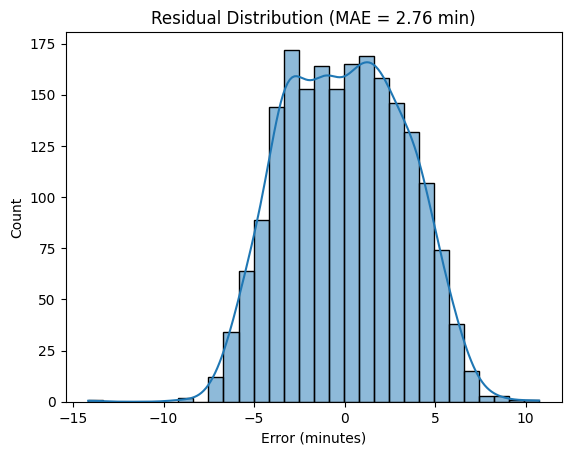

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residual Distribution (MAE = 2.76 min)')
plt.xlabel('Error (minutes)')
plt.show()